In [25]:
from scipy import integrate
import numpy as np
k = {
    'k1_xcribe_luxr': 1,
    'k2_xcribe_luxr': 1,
    'k_dec_mrna_luxr': 1,
    'k1_xlate_luxr': 1,
    'k2_xlate_luxr': 1,
    'k_dec_luxr': 1,
    'k_ext_diff_AHL': 1,
    'k_int_diff_AHL': 1,
    'k_dec_AHL': 1,
    'k_dim_luxr': 1,
    'k_sngl_luxr2': 1,
    'k_dec_luxr2': 1,
    'k_assoc_luxr2': 1,
    'k_dissoc_luxr2': 1,
    'k_decay_luxr2': 1,
    'k1_xcribe_gfp': 1,
    'k1_xcribe_leak_gfp': 1,
    'k2_xcribe_gfp': 1,
    'k_dec_mrna_gfp': 1,
    'k1_xlate_gfp': 1,
    'k2_xlate_gfp': 1,
    'k_dec_gfp': 1,
    'k1_xcribe_CI': 1,
    'k1_xcribe_leak_CI': 1,
    'k2_xcribe_CI': 1,
    'k_dec_mrna_CI': 1,
    'k1_xlate_CI': 1,
    'k2_xlate_CI': 1,
    'k_dec_CI': 1,
    'k_dim_CI': 1,
    'k_sngl_CI2': 1,
    'k_dec_CI2': 1,
    'k_assoc_CI2': 1,
    'k_dissoc_CI2': 1,
    'k_decay_CI2': 1,
}

def pulse_response_ode(U, t, P_Ltet0_1):
    dRNAp = -k['k1_xcribe_luxr'] * U[0] * P_Ltet0_1 + k['k2_xcribe_luxr'] * U[1] - k['k1_xcribe_gfp'] * U[0] * U[9] - k['k1_xcribe_leak_gfp'] * U[0] * U[8] + k['k2_xcribe_gfp'] * U[10] - k['k1_xcribe_CI'] * U[0] * U[15] + k['k2_xcribe_CI'] * U[16]
    dmRNA_Lux_RNAp = -k['k2_xcribe_luxr'] * U[1] + k['k1_xcribe_luxr'] * U[0] * P_Ltet0_1
    dmRNA_Lux_R = k['k2_xcribe_luxr'] * U[1] - k['k_dec_mrna_luxr'] * U[2]
    drRNA = -k['k1_xlate_luxr'] * U[3] * U[2] + k['k2_xlate_luxr'] * U[4] - k['k1_xlate_gfp'] * U[3] * U[11] + k['k2_xlate_gfp'] * U[12] - k['k1_xlate_CI'] * U[3] * U[17] + k['k2_xlate_CI'] * U[18]
    dLuxR_rRNA = k['k1_xlate_luxr'] * U[3] * U[2]  - k['k2_xlate_luxr'] * U[4]
    dLuxR = k['k2_xlate_luxr'] * U[4] - k['k_dec_luxr'] * U[5] - k['k_dim_luxr'] * U[6] ** 2 * U[5] ** 2 + 2 * k['k_sngl_luxr2'] * U[7]
    dAHL = k['k_ext_diff_AHL'] - k['k_int_diff_AHL'] * U[6] - k['k_dec_AHL'] * U[6] - k['k_dim_luxr'] * U[6] ** 2 * U[5] ** 2 + 2 * k['k_sngl_luxr2'] * U[7]
    dLuxR_AHL_2 = - k['k_sngl_luxr2'] * U[7] + k['k_dim_luxr'] * U[6] ** 2 * U[5] ** 2 - k['k_dec_luxr2'] * U[7] - k['k_assoc_luxr2'] * U[7] * U[8] + k['k_dissoc_luxr2'] * U[9] - k['k_assoc_luxr2'] * U[7] * U[14] - k['k_dissoc_luxr2'] * U[15]
    dLux_PR_GFP = - k['k_assoc_luxr2'] * U[7] * U[8] + k['k_dissoc_luxr2'] * U[9] + k['k_decay_luxr2'] * U[9] - k['k_assoc_CI2'] * U[20] * U[8] - k['k_dissoc_CI2'] * U[21] + k['k_dec_CI2'] * U[21]
    dLux_PR_GFP_LuxR_AHL_2 = k['k_assoc_luxr2'] * U[7] * U[8] - k['k_dissoc_luxr2'] * U[9] - k['k_decay_luxr2'] * U[9] - k['k_assoc_CI2'] * U[20] * U[9] + k['k_dissoc_CI2'] * U[22] + k['k_dec_CI2'] * U[22]
    dmRNA_GFP_RNAp = k['k1_xcribe_gfp'] * U[0] * U[9] + k['k1_xcribe_leak_gfp'] * U[0] * U[8] - k['k2_xcribe_gfp'] * U[10]
    dmRNA_GFP = k['k2_xcribe_gfp'] * U[10] - k['k_dec_mrna_gfp'] * U[11] 
    dGFP_rRNA = k['k1_xlate_gfp'] * U[3] * U[11] - k['k2_xlate_gfp'] * U[12]
    dGFP = k['k2_xlate_gfp'] * U[12] - k['k_dec_gfp'] * U[13]
    dLux_PR_CI = - k['k_assoc_luxr2'] * U[7] * U[14] + k['k_dissoc_luxr2'] * U[15] + k['k_decay_luxr2'] * U[15]
    dLux_PR_CI_LuxR_AHL_2 = k['k_assoc_luxr2'] * U[7] * U[14] - k['k_dissoc_luxr2'] * U[15] - k['k_decay_luxr2'] * U[15]
    dmRNA_CI_RNAp = k['k1_xcribe_CI'] * U[0] * U[15] + k['k1_xcribe_CI'] * U[0] * U[14] - k['k2_xcribe_CI'] * U[16]
    dmRNA_CI = k['k2_xcribe_CI'] * U[16] - k['k_dec_mrna_CI'] * U[17]
    dCI_rRNA = k['k1_xlate_CI'] * U[3] * U[17] - k['k2_xlate_CI'] * U[18]
    dCI = k['k2_xlate_CI'] * U[18] - k['k_dec_CI'] * U[19] - 2 * k['k_dim_CI'] * U[19] ** 2 + 2 * k['k_sngl_CI2'] * U[20]
    dCI2 = k['k_dim_CI'] * U[19] ** 2 - k['k_sngl_CI2'] * U[20] - k['k_dec_CI2'] * U[20] - k['k_assoc_CI2'] * U[20] * U[8] + k['k_dissoc_CI2'] * U[21] - k['k_assoc_CI2'] * U[20] * U[9] + k['k_dissoc_CI2'] * U[22]
    dLux_Pr_GFP_OR1 = k['k_assoc_CI2'] * U[20] * U[8] - k['k_dissoc_CI2'] * U[21] - k['k_dec_CI2'] * U[21] - k['k_assoc_luxr2'] * U[21] * U[7] + k['k_dissoc_luxr2'] * U[22]
    dLux_Pr_GFP_LuxR_AH1_OR1 = k['k_assoc_CI2'] * U[20] * U[9] - k['k_dissoc_CI2'] * U[22] - k['k_dec_CI2'] * U[22] + k['k_assoc_luxr2'] * U[21] * U[7] - k['k_dissoc_luxr2'] * U[22] - k['k_dec_luxr2'] * U[22]
    
    dudt = [dRNAp,
           dmRNA_Lux_RNAp,
           dmRNA_Lux_R,
           drRNA,
           dLuxR_rRNA,
           dLuxR,
           dAHL,
           dLuxR_AHL_2,
           dLux_PR_GFP,
           dLux_PR_GFP_LuxR_AHL_2,
           dmRNA_GFP_RNAp,
           dmRNA_GFP,
           dGFP_rRNA,
           dGFP,
           dLux_PR_CI,
           dLux_PR_CI_LuxR_AHL_2,
           dmRNA_CI_RNAp,
           dmRNA_CI,
           dCI_rRNA,
           dCI,
           dCI2,
           dLux_Pr_GFP_OR1,
           dLux_Pr_GFP_LuxR_AH1_OR1]
    
    return dudt
    
    
    
initial_U = np.zeros(23)
t = np.arange(0, 60, 1)
P_Ltet0_1 = 10
values = integrate.odeint(pulse_response_ode, initial_U, t, args=(P_Ltet0_1,))
    
    
    

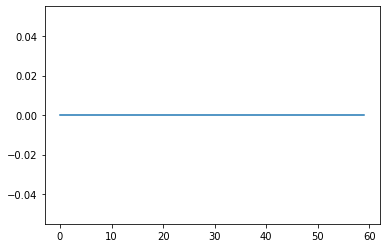

In [24]:
from matplotlib import pyplot as plt

plt.plot(t, values[:,13])